In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D, Flatten,Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [ ]:
base_dir = '/content/drive/MyDrive/CSE - 340/animals/data'
print(base_dir)

/content/drive/MyDrive/CSE - 340/animals/data


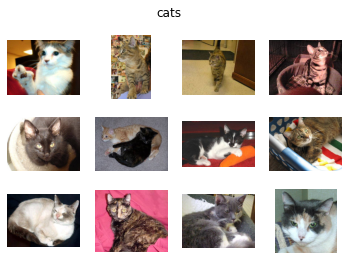

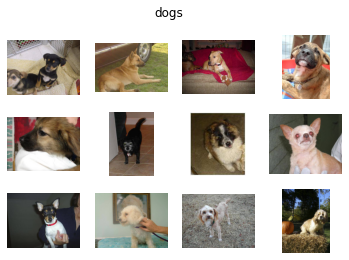

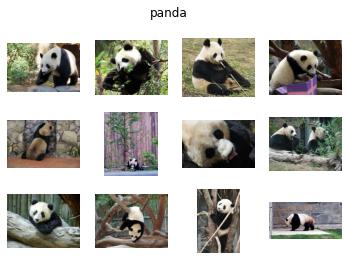

In [ ]:
class_names = ['cat','dog','pandas']
import os 
import matplotlib.pyplot as plt
path = '/content/drive/MyDrive/CSE - 340/animals/data/'
categories = ['cats', 'dogs', 'panda']
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    fig.patch.set_facecolor('xkcd:white')
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 16

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)
train_datagen = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

test_datagen = test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 2700 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [ ]:
def VGG16_Model():
  baseModel = tf.keras.applications.VGG16(weights="imagenet", include_top=False, input_tensor=tf.keras.layers.Input(shape=(224, 224, 3)))
  output = baseModel.output
  output = tf.keras.layers.AveragePooling2D(pool_size=(4, 4))(output)
  output = tf.keras.layers.Flatten(name="flatten")(output)
  output = tf.keras.layers.Dense(256, activation="relu")(output)
  output = tf.keras.layers.Dropout(0.5)(output)
  output = tf.keras.layers.Dense(3, activation="softmax")(output)
  model = tf.keras.Model(inputs=baseModel.input, outputs=output)
  for layer in baseModel.layers:
    layer.trainable = False
  return model

In [ ]:
model = VGG16_Model()

In [ ]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()])

In [ ]:
model.fit(train_datagen,epochs=10,validation_data=test_datagen,batch_size = 128)

Epoch 1/10
169/169 [==============================] - 59s 340ms/step - loss: 0.8090 - categorical_accuracy: 0.6396 - auc_1: 0.8191 - val_loss: 0.5610 - val_categorical_accuracy: 0.7900 - val_auc_1: 0.9277
Epoch 2/10
169/169 [==============================] - 56s 329ms/step - loss: 0.5261 - categorical_accuracy: 0.7941 - auc_1: 0.9305 - val_loss: 0.4504 - val_categorical_accuracy: 0.8267 - val_auc_1: 0.9498
Epoch 3/10
169/169 [==============================] - 55s 326ms/step - loss: 0.4641 - categorical_accuracy: 0.8193 - auc_1: 0.9437 - val_loss: 0.4720 - val_categorical_accuracy: 0.8033 - val_auc_1: 0.9411
Epoch 4/10
169/169 [==============================] - 56s 329ms/step - loss: 0.4100 - categorical_accuracy: 0.8330 - auc_1: 0.9555 - val_loss: 0.3911 - val_categorical_accuracy: 0.8467 - val_auc_1: 0.9592
Epoch 5/10
169/169 [==============================] - 56s 328ms/step - loss: 0.3934 - categorical_accuracy: 0.8437 - auc_1: 0.9587 - val_loss: 0.3789 - val_categorical_accuracy: 0.